In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

In [14]:
%ls

animals.rar  animals.zip  sample_data/


In [15]:
!unrar x "animals.rar" "/content"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from animals.rar

Creating    /content/animals                                          OK
Creating    /content/animals/cats                                     OK
Extracting  /content/animals/cats/cats_00001.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00002.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00003.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00004.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00005.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00006.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00007.jpg                           0%  OK 
Extracting  /content/animals/cats/cats_00008.jpg                           0%  OK 
Extracting  /content

In [27]:
dir_ = os.path.join('/content/animals/')

In [28]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)
#test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [29]:
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

In [30]:
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

In [31]:
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Output neuron. 
        Dense(3, activation='softmax') 
])

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
      train_generator,  
      epochs=100,
      verbose=1)

Epoch 1/100
2/2 [==============================] - 32s 2s/step - loss: 6.5260 - accuracy: 0.2318
Epoch 2/100
2/2 [==============================] - 7s 5s/step - loss: 1.5631 - accuracy: 0.5556
Epoch 3/100
2/2 [==============================] - 7s 2s/step - loss: 1.4530 - accuracy: 0.2778
Epoch 4/100
2/2 [==============================] - 7s 5s/step - loss: 1.0633 - accuracy: 0.5201
Epoch 5/100
2/2 [==============================] - 7s 2s/step - loss: 1.1003 - accuracy: 0.2785
Epoch 6/100
2/2 [==============================] - 7s 5s/step - loss: 1.0795 - accuracy: 0.5556
Epoch 7/100
2/2 [==============================] - 7s 5s/step - loss: 1.0723 - accuracy: 0.5556
Epoch 8/100
2/2 [==============================] - 7s 2s/step - loss: 1.0954 - accuracy: 0.2778
Epoch 9/100
2/2 [==============================] - 7s 5s/step - loss: 1.0413 - accuracy: 0.5556
Epoch 10/100
2/2 [==============================] - 7s 5s/step - loss: 1.0125 - accuracy: 0.5556
Epoch 11/100
2/2 [====================

In [33]:
model.save('lime_default')

INFO:tensorflow:Assets written to: lime_default/assets


In [34]:
model = tf.keras.models.load_model('lime_default')

In [37]:
!pip install scikit-image
from skimage import io
from skimage import transform
from tensorflow.keras.preprocessing import image

url = '/content/animals/cats/cats_00048.jpg'

def read_and_transform_img(url):

    img = io.imread(url)
    img = transform.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

It's a cat!
0.51452494


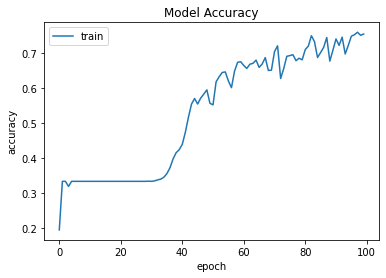

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

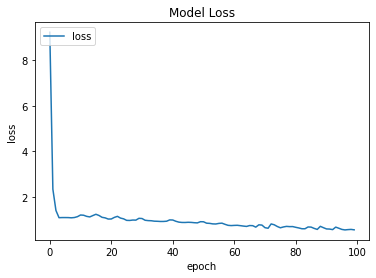

In [39]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [61]:

from skimage import io
from tensorflow.keras.preprocessing import image

# url = '/main/Lime/panda_00024.jpg'

def read_and_transform_img(url):

    img = io.imread(url)
    img = transform.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

It's a panda!
0.7838128


In [62]:
!pip install lime
from tensorflow.keras.applications import inception_v3 as inc_net
from lime import lime_image

In [63]:
explainer = lime_image.LimeImageExplainer()

In [64]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

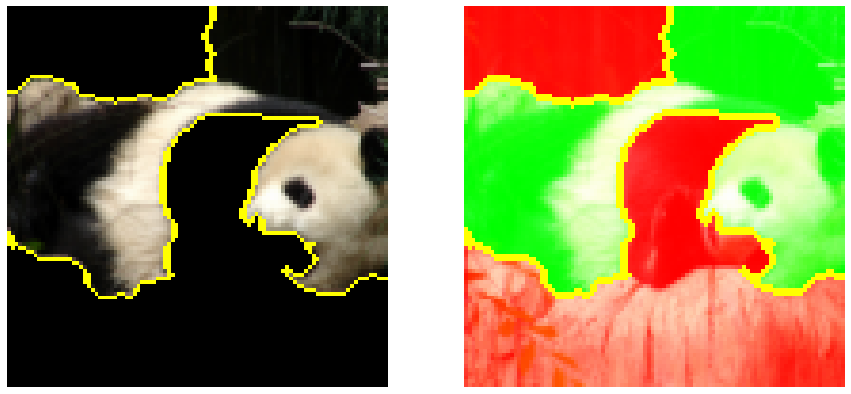

In [65]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')